<a href="https://colab.research.google.com/github/jcrpanta/AGP_2021-2/blob/main/AGP21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad: Proyección Esterográfica

Programar la proyección esterográfica del plano a la esfera en Python usando números complejos:

$$z \mapsto \left( \frac{z + \bar{z}}{|z|^2 + 1}, \frac{i(\bar{z} - z)}{|z|^2 + 1}, \frac{|z|^2 - 1}{|z|^2 + 1} \right), \qquad z \in  \mathbb{C}$$

## Proyección esterográfica

In [2]:
def proy_esterografica(z):  # z = a + bj   =====>   a, b: int or float
    e1 = (z + z.conjugate()) / (abs(z)**2 + 1) 
    e2 = ((1j) * (z.conjugate() - z)) / (abs(z)**2 + 1) 
    e3 = (abs(z)**2 - 1) / (abs(z)**2 + 1)
    
    return [e1.real, e2.real, e3.real]

* **Ejemplos**

In [3]:
proy_esterografica(1)   # 1 = 1 + 0j

[1.0, 0.0, 0.0]

In [4]:
proy_esterografica(1j)  # 1j = 0 + 1j

[0.0, 1.0, 0.0]

In [5]:
proy_esterografica(0)   # 0 = 0 + 0j

[0.0, 0.0, -1.0]

## Graficar puntos sobre la esfera

In [6]:
import matplotlib.pyplot as plt

In [7]:
def plot_puntos_esfera(lista_puntos_esfera):    # lista_puntos_esfera: [s_0, s_1, ..., s_k], 
                                                # s_i: [a_i, b_i, c_i],     (un punto en la esfera)
                                                # a_i, b_i, c_i: int or float
    ax = plt.axes(projection='3d')
    
    # Coordenadas de puntos en la esfera vista como subconjunto de R^3
    xx = [e[0] for e in lista_puntos_esfera]    # xx = [a_0, a_1, ..., a_k]
    yy = [e[1] for e in lista_puntos_esfera]    # yy = [b_0, b_1, ..., b_k]
    zz = [e[2] for e in lista_puntos_esfera]    # zz = [c_0, c_1, ..., c_k]

    return ax.scatter3D(xx, yy, zz, c='blue') # plot

* **Ejemplo**

In [9]:
import numpy as np

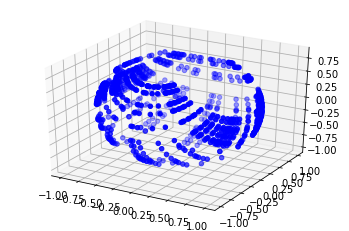

In [19]:
# Generar dos listas con m y n números aleatorios utilizando randn(): return an array of random Gaussian values
m = 30
n = 35
randomlist_1 = np.random.randn(m)
randomlist_2 = np.random.randn(n)

#Generar m * n puntos en la esfera
puntos_esfera = [proy_esterografica(complex(a, b)) for a in randomlist_1 for b in randomlist_2]

plot_puntos_esfera(puntos_esfera)

# Actividad: Nudos Aleatorios


In [11]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [48]:
def nudo_aleatorio(i, j, k):
    # Coeficientes aleatorios
    A_x = np.random.randn(i)
    n_x = np.random.randint(10**6, size=i)
    phi_x = np.random.randn(i)

    A_y = np.random.randn(j)
    n_y = np.random.randint(10**6, size=j)
    phi_y = np.random.randn(j)

    A_z = np.random.randn(k)
    n_z = np.random.randint(10**6, size=k)
    phi_z = np.random.randn(k)

    # Parametización de cada entrada como suma de cosenos
    tt = sym.Symbol('t') 

    xx_t0 = 0
    xx_t0 = sum([xx_t0 + A_x[ii] * sym.cos(n_x[ii] * tt + phi_x[ii]) for ii in range(i)])
    
    yy_t0 = 0
    yy_t0 = sum([yy_t0 + A_y[jj] * sym.cos(n_y[jj] * tt + phi_y[jj]) for jj in range(j)])

    zz_t0 = 0
    zz_t0 = sum([zz_t0 + A_z[kk] * sym.cos(n_z[kk] * tt + phi_z[kk]) for kk in range(k)])  

    lamb_xx_t0 = sym.lambdify(tt, xx_t0)
    lamb_yy_t0 = sym.lambdify(tt, yy_t0)
    lamb_zz_t0 = sym.lambdify(tt, zz_t0)
    
    # Plot
    TT = np.linspace(0, 2*np.pi, 10**2)
    
    xx_t = [lamb_xx_t0(e) for e in TT]
    yy_t = [lamb_yy_t0(e) for e in TT]
    zz_t = [lamb_zz_t0(e) for e in TT]

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(xx_t, yy_t, zz_t, label='nudo aleatorio')
    ax.legend()

    plt.show()
    return

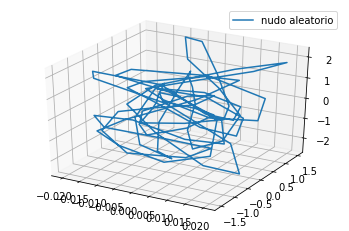

In [53]:
nudo_aleatorio(2,3,4)